<a href="https://colab.research.google.com/github/mdaugherity/Numerical2022/blob/main/fits/Week_6_Linear_Algebra_Fits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dr. Daugherity, PHYS 351, Fall 2022**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# LINEAR ALGEBRA LEAST-SQUARES FITS

A = augmented (nx2) matrix:  col[0]=$x_i$,  col[1]=1

c = (2x1) matrix, 2 parameters [a,b]   for y=ax+b

y = (nx1) matrix $y_i$


Use $  (A^TA)c=A^Ty $ and solve for c

Note that this CAN be extended to other polynomials.



ACTUAL:	 -2 3
POLYFIT	 [-1.94818241  2.6713617 ]


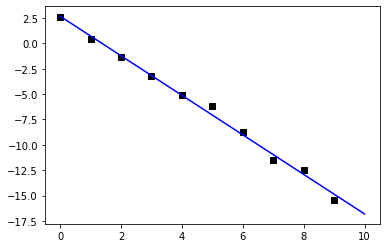

In [2]:
# RIGHT ANSWER
NUM = 10
xdata = np.arange(0,NUM)
m = -2
b = 3
ydata = -2*xdata + 3 + 0.5*np.random.randn(NUM)
print('ACTUAL:\t',m,b)
p = np.polyfit(xdata,ydata,deg=1)
print('POLYFIT\t',p)
xfit = np.linspace(0,NUM)
yfit = np.polyval(p,xfit)

plt.plot(xdata,ydata,'ks')
plt.plot(xfit,yfit,'b-')

plt.show()

## LINEAR ALGEBRA VERSION
Will give identical results to polyfit.

NOTE: the *reshape(m,n)* command will change a matrix to have dimensions m by n.  Either m or n can be replaced by a -1 which means "make this the appropriate size so my matrix has the right number of elements".  

* reshape(-1,1) creates an nx1 (column) matrix
* reshape(1,-1) creats an 1xn (row) matrix

In [3]:
# LINEAR ALGEBRA VERSION

# DEFINE MATRICES
A = np.ones((NUM,2))  # A: first column is xdata, second column is 1's 
A[:,0] = xdata  
print(A)

y = ydata.reshape(-1,1) # y: (nx1) column matrix of ydata
print(y)

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]
 [7. 1.]
 [8. 1.]
 [9. 1.]]
[[  2.61576655]
 [  0.45390631]
 [ -1.30570808]
 [ -3.23829003]
 [ -5.12867174]
 [ -6.21596268]
 [ -8.7634042 ]
 [-11.44837071]
 [-12.47990204]
 [-15.44395486]]


In [4]:
# Construct "normal" forms
ANORM = A.T @ A
#print(ANORM)
BNORM = A.T @ y
#print(BNORM)
c = np.linalg.solve(ANORM,BNORM) # c is our solution

print('ACTUAL:\t',m,b)
print('POLYFIT\t',p)
print('LIN ALG\t',c.T)

ACTUAL:	 -2 3
POLYFIT	 [-1.94818241  2.6713617 ]
LIN ALG	 [[-1.94818241  2.6713617 ]]


# Fitting Methods Extravaganza
Demonstrate consistent results doing a linear fit in a whole bunch of ways. This is really for educational purposes only--for a real problem I would just use *polyfit* and *curve_fit*

Actual Slope	 2
Actual y-int	 -1


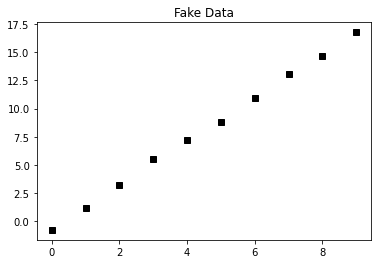

In [5]:
# Make Data
NUM = 10
xdata = np.arange(0,NUM)
slope = 2
yint = -1
ydata = slope*xdata + yint + 0.5*np.random.randn(NUM)

print('Actual Slope\t',slope)
print('Actual y-int\t',yint)

plt.title('Fake Data')
plt.plot(xdata,ydata,'ks')
plt.show()

## polyfit

[ 1.93180879 -0.63309933]


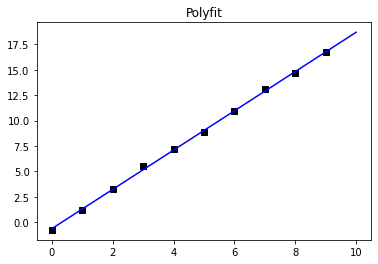

In [6]:
# Polyfit
p = np.polyfit(xdata,ydata,deg=1)
print(p)

xfit = np.linspace(0,NUM)
yfit = np.polyval(p,xfit)

plt.plot(xdata,ydata,'ks')
plt.plot(xfit,yfit,'b-')

plt.title('Polyfit')
plt.show()

## Analytic Solution
Solving the least squares fit equations by requiring the derivatives of the sum of square errors to be zero with respect to the fit parameters.


In [7]:
xbar = xdata.mean()
ybar = ydata.mean()
slope_calc = (ydata*(xdata - xbar)).sum() / (xdata*(xdata - xbar)).sum()
yint_calc = ybar - slope_calc*xbar
print(slope_calc, yint_calc)

1.9318087907906265 -0.6330993282976163


## LINEAR ALGEBRA LEAST-SQUARES FITS

A = augmented (nx2) matrix:  col[0]=$x_i$,  col[1]=1

c = (2x1) matrix, 2 parameters [a,b]   for y=ax+b

y = (nx1) matrix $y_i$


Use $  (A^TA)c=A^Ty $ and solve for c



In [8]:
# LINEAR ALGEBRA VERSION

# DEFINE MATRICES
A = np.ones((NUM,2))  # A: first column is xdata, second column is 1's 
A[:,0] = xdata  
#print(A)

y = ydata.reshape(-1,1) # y: (nx1) column matrix of ydata
#print(y)

# Construct "normal" forms
ANORM = A.T @ A
#print(ANORM)
BNORM = A.T @ y
#print(BNORM)
c = np.linalg.solve(ANORM,BNORM) # c is our solution

#print('ACTUAL:\t',m,b)
#print('POLYFIT\t',p)
print('LIN ALG\t',c.T)


LIN ALG	 [[ 1.93180879 -0.63309933]]


## curve fit

[ 1.93180879 -0.63309933]


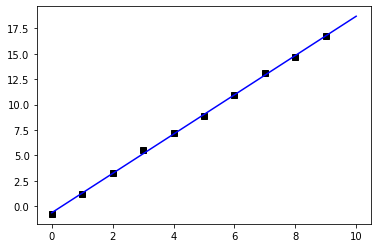

In [11]:
def fitfun(x,m,b):
  return m*x+b

popt, pcov = curve_fit(fitfun,xdata,ydata)
print(popt)

xfit = np.linspace(0,NUM)
yfit = fitfun(xfit, *popt) # *popt unpacks array into function args

plt.plot(xdata,ydata,'ks')
plt.plot(xfit,yfit,'b-')

## SUMMARY

In [12]:
print('ACTUAL\t',slope,yint)
print('polyfit\t',p)
print('LSQcalc\t',np.array([slope_calc, yint_calc]))
print('LIN ALG\t',c.T[0])
print('Fit\t',popt)  

ACTUAL	 2 -1
polyfit	 [ 1.93180879 -0.63309933]
LSQcalc	 [ 1.93180879 -0.63309933]
LIN ALG	 [ 1.93180879 -0.63309933]
Fit	 [ 1.93180879 -0.63309933]
